In [6]:
import sys
sys.path.append('../')
import json
from typing import List
from tqdm import tqdm
import glob
import os
import numpy as np
from collections import defaultdict
from skimage.color import rgb2gray
from skimage import io
from PIL import Image, ImageOps
from extract_entity import classify_all_entity, bfs, extract_bbox

In [21]:
def classify_all_entity(img_path, min_pixels=100):
    ret = []
    img = io.imread(img_path)
    img = img[3:-3, 3:-3]
    img[np.logical_and(img[:, :, 0] == 178, img[:, :, 1] ==
                       235, img[:, :, 2] == 255)] = [255, 255, 255]
    gimg = rgb2gray(img)
    # Set almost white pixel to white
    # gimg[gimg > 0.85] = 1.0

    bboxs = extract_bbox(gimg)
    bboxs = [b for b in bboxs if abs(b[2]-b[0]+1)*abs(b[3]-b[1]) >= min_pixels]
    pis = []
    for b in bboxs:
        top, left, bottom, right = b
        pi = Image.fromarray(img[top:bottom+1, left:right+1])
        # entity_class = classify_img(pi)
        # ret.append(entity_class)
        pis.append(pi)
    return  pis, gimg

In [22]:
pis, im = classify_all_entity('/home/khangln/JAIST_DRIVE/WORK/IconQA/data/iconqa_data/iconqa/test/choose_img/4/image.png')

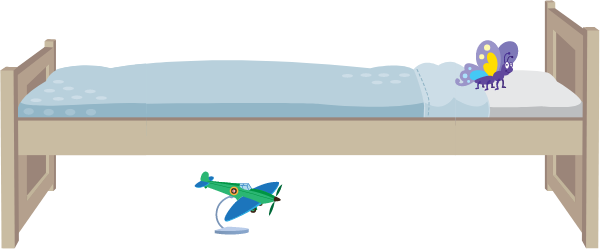

In [23]:
pis[1]

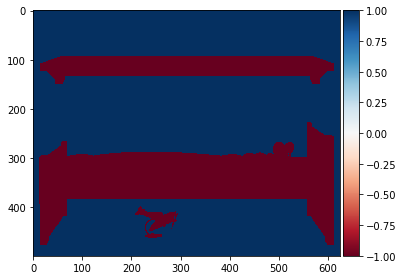

In [24]:
io.imshow(im)

In [18]:
new_im = [x for x in im]

In [32]:
new_im = np.array([[[255,0,0] if c == -1 else [255,255,255] for c in r]  for r in im])

In [39]:
new_im.astype(np.uint8)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

/home/khangln/miniconda3/envs/trans/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


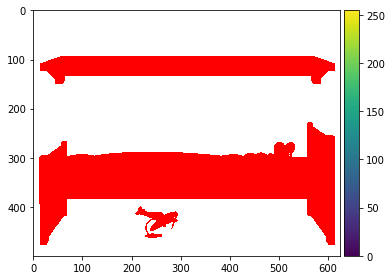

In [34]:
io.imshow(new_im)

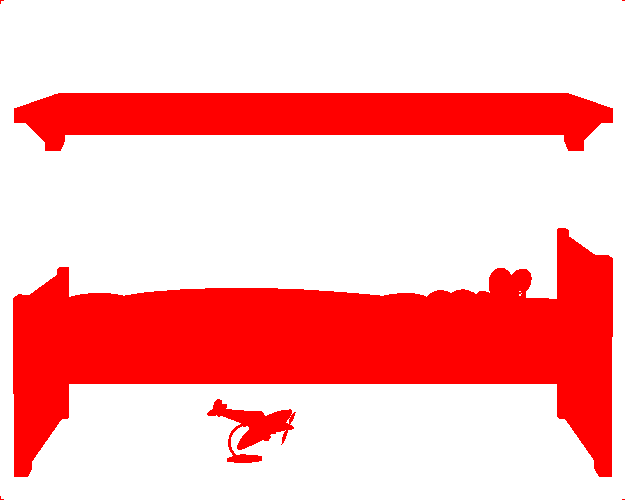

In [40]:
Image.fromarray(new_im.astype(np.uint8))